In [7]:
import matplotlib.pyplot as plt
import numpy as np
import random
import phyre
import torch
import logging
mpl_logger = logging.getLogger('matplotlib')
mpl_logger.setLevel(logging.WARNING) 

In [8]:
tier = 'ball'
eval_setup = 'ball_within_template'
fold_id = 0
random.seed(0)

### 1. Initialize the  Simulation Cache

In [9]:
train, dev, test = phyre.get_fold(eval_setup, fold_id)
print('Size of resulting splits:\n train:', len(train), '\n dev:',
      len(dev), '\n test:', len(test))

Size of resulting splits:
 train: 1600 
 dev: 400 
 test: 500


In [10]:
cache = phyre.get_default_100k_cache(tier)
print('cache.action_array shape:', cache.action_array.shape)

cache.action_array shape: (100000, 3)


### 2. Initialize the DQN Agent

In [11]:
from dqn import DQNAgent

DEBUG:root:test


In [12]:
agent = DQNAgent()

### 3. Train the Agent

In [13]:
state = agent.train(cache, train, tier, dev)

INFO:root:Preprocess the training data
INFO:root:Train set: size=117005756, solved_ratio=1.71%
INFO:root:Create evaluation data from train & dev
INFO:root:Start initializing the Model
INFO:root:Start Training the Model
DEBUG:root:Iter: 1000, examples: 64000, mean loss: 0.308559, speed: 4.2 batch/sec, lr: 0.000300
DEBUG:root:Iter: 2000, examples: 128000, mean loss: 0.207299, speed: 4.2 batch/sec, lr: 0.000300
DEBUG:root:Iter: 3000, examples: 192000, mean loss: 0.182559, speed: 4.2 batch/sec, lr: 0.000299
DEBUG:root:Iter: 4000, examples: 256000, mean loss: 0.160732, speed: 4.2 batch/sec, lr: 0.000299
DEBUG:root:Iter: 5000, examples: 320000, mean loss: 0.156757, speed: 4.2 batch/sec, lr: 0.000298
DEBUG:root:Iter: 6000, examples: 384000, mean loss: 0.145221, speed: 4.2 batch/sec, lr: 0.000297
DEBUG:root:Iter: 7000, examples: 448000, mean loss: 0.141806, speed: 4.2 batch/sec, lr: 0.000296
DEBUG:root:Iter: 8000, examples: 512000, mean loss: 0.134591, speed: 4.2 batch/sec, lr: 0.000295
DEBUG:

### 4. Evaluate the Agent

In [14]:
evaluator = agent.eval(state, test, tier)

#### 4.1 Percentage of solved tasks per number of attempts

In [19]:
baseline = evaluator.compute_all_metrics()['independent_solved_by'][1:]

In [20]:
two_head  = np.load('./two_head.npy')
attention = np.load('./attention.npy')

In [27]:
np.array(baseline).shape

(100,)

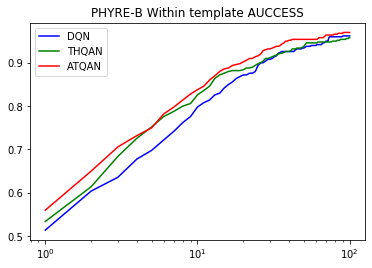

In [47]:
plt.plot(np.arange(phyre.MAX_TEST_ATTEMPTS)+1, baseline, label = 'DQN'   ,color = 'blue')
plt.plot(np.arange(phyre.MAX_TEST_ATTEMPTS)+1, two_head, label = 'THQAN' ,color = 'green')
plt.plot(np.arange(phyre.MAX_TEST_ATTEMPTS)+1, attention, label = 'ATQAN',color = 'red')
plt.legend()
plt.title('PHYRE-B Within template AUCCESS')
plt.xscale('log')
plt.savefig('AUCESS.png', dpi=300)
plt.show()

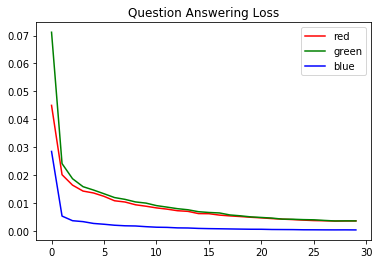

In [48]:
loss = np.load('./predict_loss.npy')
plt.plot(np.arange(30), loss[:,0], label = 'red', color = 'red')
plt.plot(np.arange(30), loss[:,1], label = 'green', color = 'green')
plt.plot(np.arange(30), loss[:,2], label = 'blue', color = 'blue')
plt.title('Question Answering Loss')
plt.legend()
plt.savefig('QA_LOSS.png', dpi=300)
plt.show()

In [43]:
loss

array([[0.04498, 0.07119, 0.02847],
       [0.02013, 0.02411, 0.0053 ],
       [0.01639, 0.01869, 0.00364],
       [0.01426, 0.01584, 0.00331],
       [0.01358, 0.01463, 0.00266],
       [0.01237, 0.0133 , 0.00237],
       [0.01079, 0.01194, 0.00202],
       [0.01034, 0.01129, 0.00182],
       [0.00935, 0.01037, 0.00175],
       [0.00883, 0.00995, 0.0015 ],
       [0.00823, 0.00905, 0.00131],
       [0.00779, 0.00851, 0.00125],
       [0.00722, 0.00795, 0.00107],
       [0.00699, 0.00756, 0.00103],
       [0.00619, 0.00687, 0.00088],
       [0.00615, 0.00659, 0.0008 ],
       [0.00565, 0.00642, 0.00075],
       [0.00536, 0.0057 , 0.00069],
       [0.00513, 0.00539, 0.00063],
       [0.00487, 0.005  , 0.00058],
       [0.00466, 0.0048 , 0.00057],
       [0.0044 , 0.00458, 0.00049],
       [0.0042 , 0.00421, 0.00047],
       [0.00404, 0.00416, 0.00045],
       [0.00385, 0.00403, 0.00039],
       [0.00369, 0.00396, 0.00038],
       [0.00362, 0.00374, 0.00036],
       [0.00351, 0.00355, 0.

#### 4.2 AUCESS

In [16]:
print('AUCESS after 100 attempts on test set', evaluator.get_aucess())

AUCESS after 100 attempts on test set 0.7627488222516529


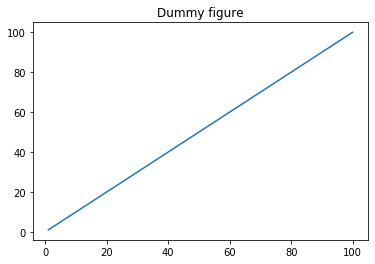

In [6]:
plt.title('Dummy figure')
plt.plot(np.arange(phyre.MAX_TEST_ATTEMPTS)+1, np.arange(phyre.MAX_TEST_ATTEMPTS)+1)
